# Exploratory Data Analysis: c_summary, c_daily, i_fod, and i_ref.

This notebook explores the data given to us by our partner, Lise Ann St. Denis of the Colorado-Wyoming Resilience Engine. In reviewing the datasets, we will examine the types of data and the nubmber of records, and we will perform some initial statistical analysis.

In [1]:
# import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt



In [2]:
# drive.mount('/content/drive', force_remount=True)


In [3]:
# Load CSV files and assign to variables
i_fod = pd.read_csv("ics209plus-wf-incidents-fod-draft_1999to2023.csv")
i_ref = pd.read_csv("ics209plus-wf_incidents-reference_2014to2023.csv")
c_daily = pd.read_csv("ics209plus-wf_complex-assoc-daily_2014to2023-draft.csv")
c_summary = pd.read_csv("ics209plus-wf-complex-summary-draft_2014to2023.csv")

C:\Users\moenc\AppData\Local\Temp\ipykernel_28768\2950357163.py:2: DtypeWarning: Columns (1,26,28,35,36,37,38,44,45) have mixed types. Specify dtype option on import or set low_memory=False.
  i_fod = pd.read_csv("ics209plus-wf-incidents-fod-draft_1999to2023.csv")
C:\Users\moenc\AppData\Local\Temp\ipykernel_28768\2950357163.py:3: DtypeWarning: Columns (42,51,52,53,54,55,61) have mixed types. Specify dtype option on import or set low_memory=False.
  i_ref = pd.read_csv("ics209plus-wf_incidents-reference_2014to2023.csv")


In [4]:
from IPython.display import display, HTML

def show_df(df, height=400):
    """Display a scrollable HTML table of the DataFrame or a GroupBy object."""

    # If the object is a GroupBy object, first apply an aggregation (e.g., count, sum, mean)
    if isinstance(df, pd.core.groupby.DataFrameGroupBy):
        # Here we apply a count aggregation, but you can change it to other aggregations like sum, mean, etc.
        df = df.size().reset_index(name='count')

    # Display the DataFrame in a scrollable HTML format
    display(HTML(f"""
    <div style="height:{height}px; overflow:auto">
        {df.to_html(max_rows=None, max_cols=None)}
    </div>
    """))

In [5]:
# Comment these out depending on who is running the code.
# Sara's filepaths
# filepath1 = '/content/drive/MyDrive/Earth Analytics ICS209/ics209plus-wf_complex-assoc-daily_2014to2023-draft.csv'
# filepath2 = '/content/drive/MyDrive/Earth Analytics ICS209/ics209plus-wf_incidents-reference_2014to2023.csv'
# filepath3 = '/content/drive/MyDrive/Earth Analytics ICS209/ics209plus-wf-complex-summary-draft_2014to2023.csv'
# filepath4 = '/content/drive/MyDrive/Earth Analytics ICS209/ics209plus-wf-incidents-fod-draft_1999to2023.csv'


In [6]:
# c_daily = pd.read_csv(filepath1)
# i_ref = pd.read_csv(filepath2)
# c_summary = pd.read_csv(filepath3)
# i_fod = pd.read_csv(filepath4)


In [7]:
c_daily.head()
#Multiple entries per fire means we need to group by IDs to do any kind of meaningful statistical analysis or visualization.

,ACRES,CPLX_INC209R_IDENTIFIER,CPLX_INCIDENT_ID,CPLX_INCIDENT_NAME,CPLX_INC_IDENTIFIER,EST_IM_COST_TO_DATE,MEMBER_INC209R_EXISTS,MEMBER_INCIDENT_ID,MEMBER_INCIDENT_NAME,MEMBER_INC_IDENTIFIER,PCT_CONTAINED_COMPLETED,PCT_CONT_COMPL_UOM,REPORT_TO_DATE,SUPPRESSION_STRATEGY
0,2520.0,402978.0,2014_402977_SAN DIEGO COMPLEX,SAN DIEGO COMPLEX,402977.0,3180978.0,True,2014_403676_COCOS,COCOS,403676.0,50.0,PCT,2014-05-17 08:00:00,NaN
1,386.0,402978.0,2014_402977_SAN DIEGO COMPLEX,SAN DIEGO COMPLEX,402977.0,NaN,True,2014_403706_HIGHWAY,HIGHWAY,403706.0,95.0,PCT,2014-05-17 08:00:00,NaN
2,2520.0,407209.0,2014_402977_SAN DIEGO COMPLEX,SAN DIEGO COMPLEX,402977.0,2996116.0,True,2014_403676_COCOS,COCOS,403676.0,70.0,PCT,2014-05-17 20:00:00,NaN
3,386.0,407209.0,2014_402977_SAN DIEGO COMPLEX,SAN DIEGO COMPLEX,402977.0,843796.0,True,2014_403706_HIGHWAY,HIGHWAY,403706.0,100.0,PCT,2014-05-17 20:00:00,NaN
4,NaN,407209.0,2014_402977_SAN DIEGO COMPLEX,SAN DIEGO COMPLEX,402977.0,1366967.0,True,2014_402977_SAN DIEGO COMPLEX,SAN DIEGO COMPLEX,402977.0,70.0,PCT,2014-05-17 20:00:00,NaN


In [8]:

c_daily.columns

Index(['ACRES', 'CPLX_INC209R_IDENTIFIER', 'CPLX_INCIDENT_ID',
       'CPLX_INCIDENT_NAME', 'CPLX_INC_IDENTIFIER', 'EST_IM_COST_TO_DATE',
       'MEMBER_INC209R_EXISTS', 'MEMBER_INCIDENT_ID', 'MEMBER_INCIDENT_NAME',
       'MEMBER_INC_IDENTIFIER', 'PCT_CONTAINED_COMPLETED',
       'PCT_CONT_COMPL_UOM', 'REPORT_TO_DATE', 'SUPPRESSION_STRATEGY'],
      dtype='object')

In [9]:
c_daily.describe()

,ACRES,CPLX_INC209R_IDENTIFIER,CPLX_INC_IDENTIFIER,EST_IM_COST_TO_DATE,MEMBER_INC_IDENTIFIER,PCT_CONTAINED_COMPLETED
count,4.110800e+04,4.211700e+04,4.211700e+04,1.391300e+04,4.211700e+04,38898.000000
mean,1.139432e+04,9.557157e+06,9.550248e+06,1.258301e+07,9.545191e+06,59.476078
std,4.584479e+04,5.001224e+06,5.010649e+06,3.866945e+07,5.007593e+06,44.989481
min,0.000000e+00,4.029780e+05,4.029770e+05,0.000000e+00,4.005030e+05,0.000000
25%,1.000000e+00,2.933045e+06,2.931055e+06,3.000000e+04,2.925193e+06,0.000000
50%,1.420000e+02,1.186637e+07,1.186597e+07,7.000000e+05,1.183010e+07,90.000000
75%,2.678000e+03,1.296330e+07,1.295877e+07,7.866249e+06,1.297025e+07,100.000000
max,1.032648e+06,1.611716e+07,1.611592e+07,4.944015e+08,1.611871e+07,404.000000


In [10]:
c_daily.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42117 entries, 0 to 42116
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ACRES                    41108 non-null  float64
 1   CPLX_INC209R_IDENTIFIER  42117 non-null  float64
 2   CPLX_INCIDENT_ID         42117 non-null  object 
 3   CPLX_INCIDENT_NAME       42117 non-null  object 
 4   CPLX_INC_IDENTIFIER      42117 non-null  float64
 5   EST_IM_COST_TO_DATE      13913 non-null  float64
 6   MEMBER_INC209R_EXISTS    42117 non-null  bool   
 7   MEMBER_INCIDENT_ID       42117 non-null  object 
 8   MEMBER_INCIDENT_NAME     42117 non-null  object 
 9   MEMBER_INC_IDENTIFIER    42117 non-null  float64
 10  PCT_CONTAINED_COMPLETED  38898 non-null  float64
 11  PCT_CONT_COMPL_UOM       42069 non-null  object 
 12  REPORT_TO_DATE           42117 non-null  object 
 13  SUPPRESSION_STRATEGY     35375 non-null  object 
dtypes: bool(1), float64(6)

In [11]:
unique_counts = c_daily.nunique()

# Print results nicely
for column, count in unique_counts.items():
    print(f"{column}: {count} ")

ACRES: 5111 
CPLX_INC209R_IDENTIFIER: 6622 
CPLX_INCIDENT_ID: 233 
CPLX_INCIDENT_NAME: 225 
CPLX_INC_IDENTIFIER: 233 
EST_IM_COST_TO_DATE: 6072 
MEMBER_INC209R_EXISTS: 2 
MEMBER_INCIDENT_ID: 1376 
MEMBER_INCIDENT_NAME: 1273 
MEMBER_INC_IDENTIFIER: 1376 
PCT_CONTAINED_COMPLETED: 121 
PCT_CONT_COMPL_UOM: 2 
REPORT_TO_DATE: 4687 
SUPPRESSION_STRATEGY: 4 


In [12]:
#change the date colum to datetime format
c_daily['REPORT_TO_DATE'] = pd.to_datetime(c_daily['REPORT_TO_DATE'])

In [13]:
latest_costs = c_daily.loc[c_daily.groupby('CPLX_INCIDENT_ID')['REPORT_TO_DATE'].idxmax()]
latest_costs = latest_costs.reset_index(drop=True)

# Keep only relevant columns
latest_costs = latest_costs[['CPLX_INCIDENT_ID', 'REPORT_TO_DATE', 'EST_IM_COST_TO_DATE']]

# Show result
print(latest_costs.head())


                 CPLX_INCIDENT_ID      REPORT_TO_DATE  EST_IM_COST_TO_DATE
0   2014_402977_SAN DIEGO COMPLEX 2014-05-23 08:00:00            4193696.0
1    2014_407445_BASILONE COMPLEX 2014-07-02 08:15:00                  NaN
2  2014_571039_MODOC JULY COMPLEX 2014-07-09 08:00:00            2050000.0
3         2014_580435_MGC COMPLEX 2014-07-10 08:15:00            1100000.0
4     2014_634805_BUZZARD COMPLEX 2014-09-11 10:00:00                  NaN


In [14]:
incident_counts = c_daily['CPLX_INCIDENT_ID'].value_counts()
print(incident_counts.head(10))  # See the top few

print("Number of incidents with more than 1 entry:", (incident_counts > 1).sum())

CPLX_INCIDENT_ID
2020_11865970_NORTH COMPLEX                 2766
2021_12958767_RIVER COMPLEX                 2134
2017_7253911_MILLER COMPLEX                 1521
2022_14514022_2022 SRF LIGHTNING COMPLEX    1290
2021_12692752_COUGAR ROCK COMPLEX           1288
2021_12965990_ROUGH PATCH COMPLEX           1158
2021_12939299_STORM THEATRE COMPLEX         1123
2020_11843929_AUGUST COMPLEX                1090
2023_16060313_2023 SRF LIGHTNING COMPLEX    1042
2021_12802924_STATELINE COMPLEX             1029
Name: count, dtype: int64
Number of incidents with more than 1 entry: 229


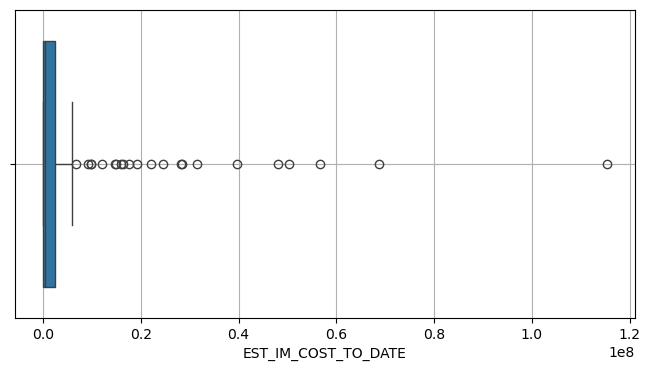

In [15]:
plt.figure(figsize=(8, 4))
sns.boxplot(x=latest_costs['EST_IM_COST_TO_DATE'])
#sns.histplot(c_daily['EST_IM_COST_TO_DATE'], bins=4)
#plt.title('Box Plot of EST_IM_COST_TO_DATE')
plt.xlabel('EST_IM_COST_TO_DATE')
plt.grid(True)
plt.show()

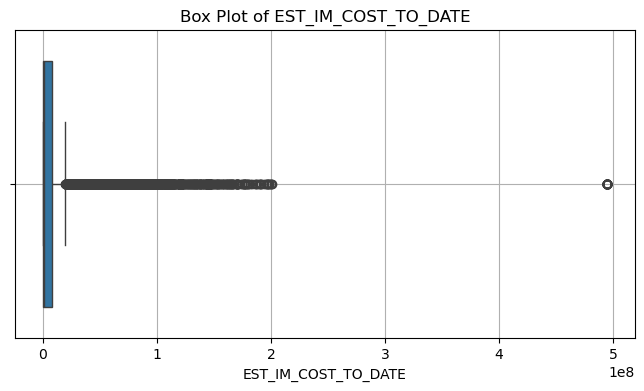

In [16]:
plt.figure(figsize=(8, 4))
sns.boxplot(x=c_daily['EST_IM_COST_TO_DATE'])
#sns.histplot(c_daily['EST_IM_COST_TO_DATE'], bins=4)
plt.title('Box Plot of EST_IM_COST_TO_DATE')
plt.xlabel('EST_IM_COST_TO_DATE')
plt.grid(True)
plt.show()

                 CPLX_INCIDENT_ID      REPORT_TO_DATE   ACRES
0   2014_402977_SAN DIEGO COMPLEX 2014-05-23 08:00:00     NaN
1    2014_407445_BASILONE COMPLEX 2014-07-02 08:15:00  5367.0
2  2014_571039_MODOC JULY COMPLEX 2014-07-09 08:00:00  1469.0
3         2014_580435_MGC COMPLEX 2014-07-10 08:15:00  1127.0
4     2014_634805_BUZZARD COMPLEX 2014-09-11 10:00:00   728.0


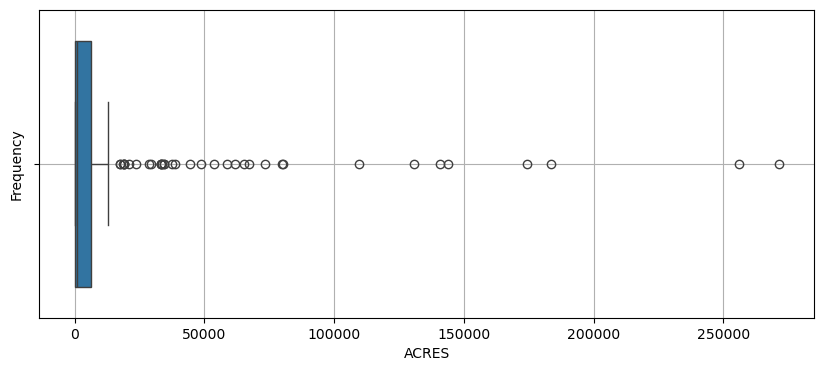

In [17]:
latest = c_daily.loc[c_daily.groupby('CPLX_INCIDENT_ID')['REPORT_TO_DATE'].idxmax()]
latest_acres = latest.copy()
latest_acres = latest_acres.reset_index(drop=True)

# Keep only relevant columns
latest_acres = latest_acres[['CPLX_INCIDENT_ID', 'REPORT_TO_DATE', 'ACRES']]

# Show result
print(latest_acres.head())

plt.figure(figsize=(10, 4))
sns.boxplot(x=latest_acres['ACRES'])
#sns.histplot(c_daily['ACRES'], bins=30, kde=True)
#plt.title('Histogram of ACRES')
plt.xlabel('ACRES')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [18]:
#Top 10 biggest fires
# Sort by acres burned (in descending order)
top_10_biggest_fires = latest_acres.sort_values(by='ACRES', ascending=False).head(10)

# Show the top 10 biggest fires and their acreage
print(top_10_biggest_fires[['CPLX_INCIDENT_ID', 'ACRES']])

                           CPLX_INCIDENT_ID      ACRES
173  2020_11937412_AUGUST COMPLEX WEST ZONE  271421.00
6               2014_638842_CARLTON COMPLEX  256108.00
61           2015_2852141_TANANA AREA FIRES  183512.00
163               2020_11801418_SQF COMPLEX  174178.00
159        2020_11740185_RED SALMON COMPLEX  143891.00
167            2020_11843929_AUGUST COMPLEX  140944.00
152       2019_10715052_CHALKYITSIK COMPLEX  130768.00
28           2014_809568_HAPPY CAMP COMPLEX  109439.00
67        2015_2878511_GRIZZLY BEAR COMPLEX   80212.50
185               2021_12828308_KNP COMPLEX   80102.75


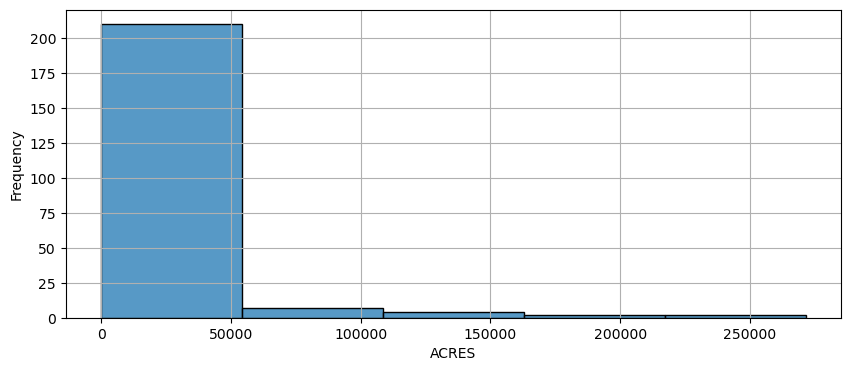

In [19]:
plt.figure(figsize=(10, 4))
#sns.boxplot(x=c_daily['ACRES'])
sns.histplot(latest_acres['ACRES'], bins=5)
#plt.title('Histogram of ACRES')
plt.xlabel('ACRES')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [20]:
c_daily.SUPPRESSION_STRATEGY.unique()

array([nan, 'Full Suppression', 'Confine', 'Point Zone Protection',
       'Monitor'], dtype=object)

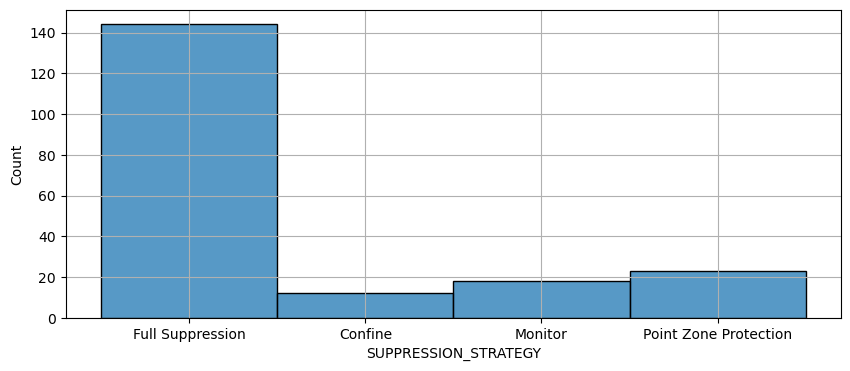

In [21]:
plt.figure(figsize=(10, 4))
sns.histplot(latest['SUPPRESSION_STRATEGY'], bins=30)
#plt.title('Histogram of ACRES')
#plt.xlabel('ACRES')
#plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [22]:
i_ref.head()

,Unnamed: 0,ACRES,CAUSE,COMPLEX,COMPLEXITY_LEVEL,COMPLEXITY_LEVEL_NARR,CREATED_BY,CREATED_DATE,CY,DISCOVERY_DATE,...,POO_US_NGR_YCOORD,POO_US_NGR_ZONE,POO_UTM_EASTING,POO_UTM_NORTHING,POO_UTM_ZONE,PROT_UNIT_ID,PROT_UNIT_NAME,PROT_UNIT_TYPE,START_YEAR,UNIFIED_COMMAND
0,0,1300.0,H,False,NaN,NaN,SIT209,2014-01-15 10:31:48,2014,2014-01-12 11:45:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014.0,NaN
1,1,400.0,H,False,NaN,NaN,SIT209,2014-01-15 11:05:06,2014,2014-01-12 14:00:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014.0,NaN
2,2,1612.0,L,False,NaN,NaN,SIT209,2014-01-15 19:32:24,2014,2014-01-14 10:45:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014.0,NaN
3,3,1.0,H,False,NaN,NaN,SIT209,2014-01-17 11:17:28,2014,2014-01-16 15:45:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014.0,NaN
4,4,40.0,U,False,NaN,NaN,SIT209,2014-01-17 12:29:20,2014,2014-01-16 14:30:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014.0,NaN


In [23]:
unique_counts = i_ref.nunique()

# Print results nicely
for column, count in unique_counts.items():
    print(f"{column}: {count} ")

Unnamed: 0: 16963 
ACRES: 5553 
CAUSE: 4 
COMPLEX: 2 
COMPLEXITY_LEVEL: 5 
COMPLEXITY_LEVEL_NARR: 1109 
CREATED_BY: 170 
CREATED_DATE: 16256 
CY: 10 
DISCOVERY_DATE: 16307 
DONWCGU_PROT_UNIT_IDENTIFIER: 3279 
EST_IM_COST_TO_DATE: 4255 
EXT_SYSTEM_LAST_MODIFIED_BY: 18 
EXT_SYSTEM_LAST_MODIFIED_DATE: 14809 
FIRECODE: 8817 
INCIDENT_AREA: 5543 
INCIDENT_COMMANDERS_NARR: 10081 
INCIDENT_ID: 16963 
INCIDENT_IDENTIFIER: 16963 
INCIDENT_NAME: 13664 
INCIDENT_NUMBER: 10349 
INCTYP_ABBREVIATION: 17 
INC_AREA_UOM: 2 
INC_MGMT_ORG: 9 
IRWIN_IDENTIFIER: 16088 
LAST_MODIFIED_BY: 7 
LAST_MODIFIED_DATE: 15738 
LOCAL_TIMEZONE: 19 
NWCG_OWN_UNIT_IDENTIFIER: 3292 
NWCG_PROT_UNIT_IDENTIFIER: 3031 
OWN_UNIT_ID: 1010 
OWN_UNIT_NAME: 1041 
OWN_UNIT_TYPE: 11 
PCT_CONTAINED_COMPLETED: 83 
PCT_CONT_COMPL_UOM: 1 
POO_CITY: 4125 
POO_COUNTY_CODE: 256 
POO_DONWCGU_OWN_IDENTIFIER: 3504 
POO_LATITUDE: 9750 
POO_LD_PM: 41 
POO_LD_QTR_QTR_QTR_QTR_SEC: 0 
POO_LD_QTR_QTR_QTR_SEC: 0 
POO_LD_QTR_QTR_SEC: 4 
POO_LD_QTR_SE